In [29]:
#Part I
import matplotlib.pylab as plt   # That gives plotting, and the next line makes plots appear inline in notebook
%matplotlib inline  
import numpy as np  # That gives numerical arrays and tools for manipulating them

import scipy.optimize as opt
import scipy.linalg as la
import scipy.integrate as int


In [30]:
def toggle_odefun(t,x,a,b,beta,gamma):
    x1=x[0] 
    x2=x[1]
    x3=x[2]
    x4=x[3]
    

    dx1dt=-x1 + a/(1+x2**x3)
    dx2dt=-beta*x2+beta*x1 + gamma*x4-gamma*x2
    dx3dt=-x3+a/(1+x4**x3)
    dx4dt=-beta*x4+beta*x3+gamma*x2-gamma*x4

    
    return np.array([dx1dt,dx2dt,dx3dt,dx4dt])


In [31]:
a=2
b=4
beta=3
gamma=-1

In [32]:
t=0   #MUST define a value of time for calling ode function above, even if it is not used in defining the ODE 

x1min=0
x1max=a*1.5
numptsx1=12
x1list=np.linspace(x1min,x1max,numptsx1)

x2min=0
x2max=a*1.5
numptsx2=12
x2list=np.linspace(x2min,x2max,numptsx2)

x3min=0
x3max=a*1.5
numptsx3=12
x3list=np.linspace(x3min,x3max,numptsx3)

x4min=0
x4max=a*1.5
numptsx4=12
x4list=np.linspace(x4min,x4max,numptsx4)

In [33]:
x1array,x2array = np.meshgrid(x1list,x2list)
dx1dt_array=np.zeros(x1array.shape)
dx2dt_array=np.zeros(x1array.shape)
x3array,x4array = np.meshgrid(x3list,x4list)
dx3dt_array=np.zeros(x3array.shape)
dx4dt_array=np.zeros(x3array.shape)

In [34]:

for i in np.arange(numptsx1):
    for j in np.arange(numptsx2):
        
        #here, F is an array of velocities in x1 and x2 directions    
        F=toggle_odefun(t,[x1array[i,j],x2array[i,j],x3array[i,j],x4array[i,j]],a,b,beta,gamma)

        #We fill in these two matrices with the corresponding velocities
        dx1dt_array[i,j]=F[0]
        dx2dt_array[i,j]=F[1]
        dx3dt_array[i,j]=F[0]
        dx4dt_array[i,j]=F[1]
        

In [35]:
x1list_fine=np.linspace(x1min,x1max,100)
x2list_fine=np.linspace(x2min,x2max,100)
x3list_fine=np.linspace(x3min,x3max,100)
x4list_fine=np.linspace(x4min,x4max,100)

x1_nullcline_list=a/(1+x2list_fine**x3list_fine);
x2_nullcline_list=gamma*x4list_fine-gamma*x2list_fine;
x3_nullcline_list=a/(1+x4list_fine**x3list_fine);
x4_nullcline_list=gamma*x2list_fine-gamma*x4list_fine;

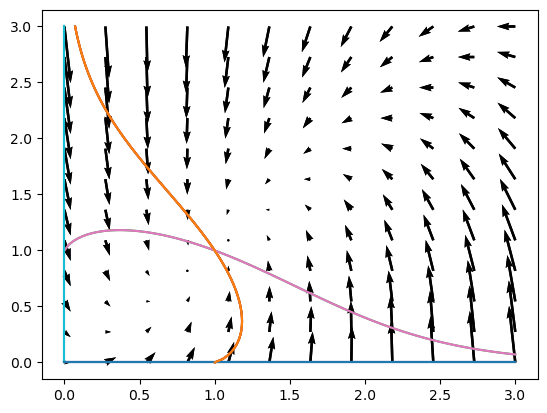

In [36]:
plt.figure(1)
plt.plot(x1list_fine,x2_nullcline_list)
plt.plot(x1_nullcline_list,x2list_fine)
plt.plot(x1list_fine,x3_nullcline_list)
plt.plot(x1_nullcline_list,x3list_fine)
plt.plot(x1list_fine,x4_nullcline_list)
plt.plot(x1_nullcline_list,x4list_fine)
plt.plot(x2list_fine,x3_nullcline_list)
plt.plot(x2_nullcline_list,x3list_fine)
plt.plot(x2list_fine,x4_nullcline_list)
plt.plot(x2_nullcline_list,x4list_fine)
plt.plot(x3list_fine,x4_nullcline_list)
plt.plot(x3_nullcline_list,x4list_fine)
plt.quiver(x1array,x2array,dx1dt_array,dx2dt_array)
plt.quiver(x3array,x4array,dx3dt_array,dx4dt_array) 

In [37]:
#According to my code it does not matter what value gamma takes.
#The plots do not change and converges to the same point over time.

In [38]:
#Part II